In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import metrics
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
def pca_n_svm(x,y,Model_Name,n_pca = 50, kernel = 'poly', PC1 = 0, PC2 = 1):
    
    # standardize data
    x = StandardScaler().fit_transform(x)
    
    # PCA
    pca = PCA(n_components = n_pca)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents)
    PCA_df = pd.concat([principalDf, y], axis = 1)
    
    pca_x = PCA_df.drop('label', axis = 1).values
    pca_y = PCA_df['label'].values
    X_train, X_test, y_train, y_test = train_test_split(pca_x, pca_y, test_size=0.3,random_state=109) # 70% training and 30% test
    
    #Create a svm Classifier
    clf = svm.SVC(kernel=kernel) # Polynomial Kernel
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    
    
    PCA_df["label"].replace({0: "Fake", 1: 'Real'}, inplace=True)
    # Scatter plot of PC0 and PC1
    sns.scatterplot(x=PC1, y=PC2, data=PCA_df,  hue="label")
    plt.title(Model_Name,fontsize=14)
    # Set x-axis label
    plt.xlabel('PC' + str(PC1))
    # Set y-axis label
    plt.ylabel('PC' + str(PC2))
    



## Custom CNN Model

In [7]:
# get last layer vector
Custom_CNN = pd.read_csv('int_output_Custom_CNN.csv')
# shuffle
Custom_CNN = Custom_CNN.sample(frac=1).reset_index(drop=True)
Model_Name_1='Custom CNN Model'

In [8]:
x = Custom_CNN.drop('label', axis = 1).values
y = Custom_CNN['label']

Accuracy: 0.9712333333333333
Precision: 0.9691093875367746
Recall: 0.9730782141658274


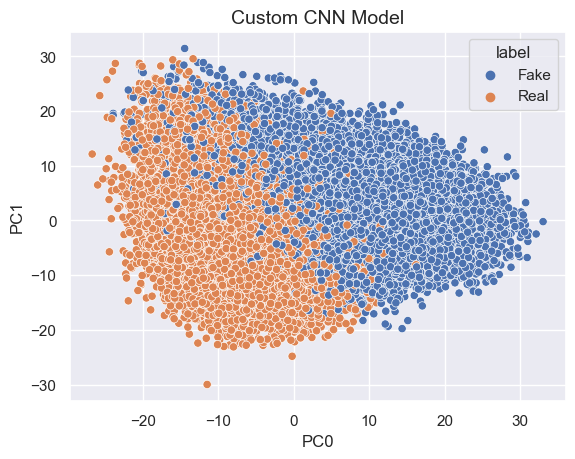

In [9]:
pca_n_svm(x,y,Model_Name_1)   

## DenseNet Model

In [10]:
# get last layer vector
DenseNet_model = pd.read_csv('int_output_DenseNet_model.csv')
# shuffle
DenseNet_model = DenseNet_model.sample(frac=1).reset_index(drop=True)
Model_Name_2='The DenseNet Model'

In [11]:
x = DenseNet_model.drop('label', axis = 1).values
y = DenseNet_model['label']

Accuracy: 0.9919666666666667
Precision: 0.9944100215517241
Recall: 0.9894123165583327


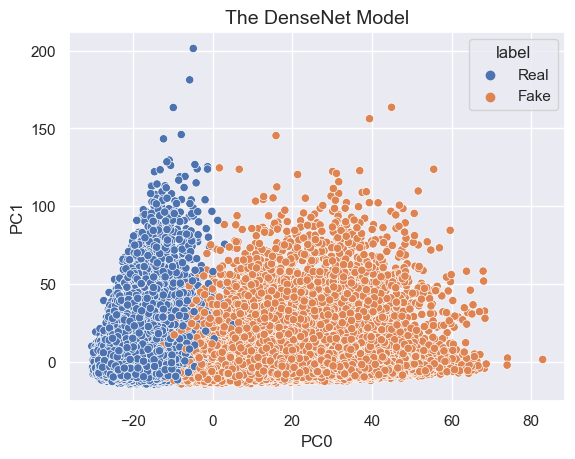

In [12]:
pca_n_svm(x,y,Model_Name_2)   

## DenseNet with Augmented Data

In [13]:
# get last layer vector
DenseNet_Augmented_model = pd.read_csv('int_output_DenseNet_Augmented_model.csv')
# shuffle
DenseNet_Augmented_model = DenseNet_Augmented_model.sample(frac=1).reset_index(drop=True)
Model_Name_3='The DenseNet Model with Image Augmentations'

In [14]:
x = DenseNet_Augmented_model.drop('label', axis = 1).values
y = DenseNet_Augmented_model['label']

Accuracy: 0.9384
Precision: 0.9429941395844432
Recall: 0.9345300950369588


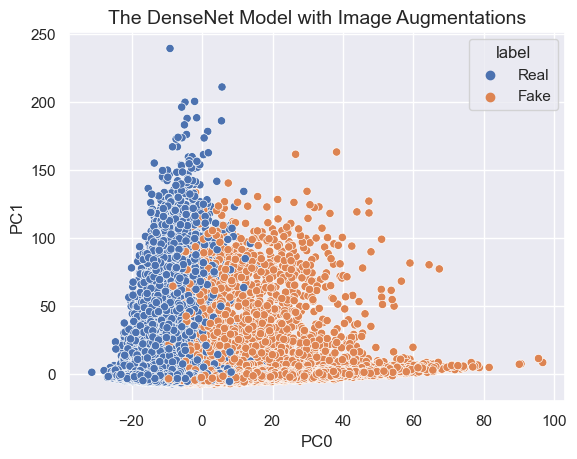

In [15]:
pca_n_svm(x,y,Model_Name_3)

## DenseNet with Gray Scale Images

In [16]:
# get last layer vector
DenseNet_Grayscale_model = pd.read_csv('int_output_DenseNet_Grayscale_model.csv')
# shuffle
DenseNet_Grayscale_model = DenseNet_Grayscale_model.sample(frac=1).reset_index(drop=True)
Model_Name_4='The DenseNet Model with Grayscale Images'

In [17]:
x = DenseNet_Grayscale_model.drop('label', axis = 1).values
y = DenseNet_Grayscale_model['label']

Accuracy: 0.5015666666666667
Precision: 0.5046816479400749
Recall: 0.46456275276801695


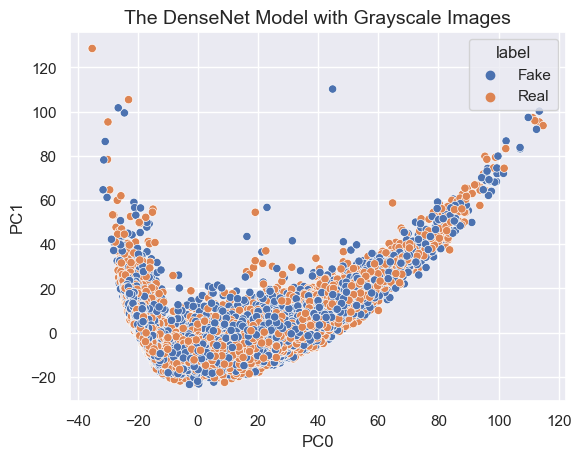

In [18]:
pca_n_svm(x,y,Model_Name_4)